# Products

## Imports

In [32]:
import pandas as pd
products_url = "https://raw.githubusercontent.com/MerleSt/Eniac/main/Data-Eniac/products.csv"
products = pd.read_csv(products_url)
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


## Drop Duplicates

In [33]:
products.duplicated().sum()

8746

In [34]:
products.drop_duplicates(inplace=True)
products.duplicated().sum()

0

## Missing Values

In [36]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

### Desc

In [37]:
(f"7 missing values represents {((products.desc.isna().sum() / products.shape[0])*100).round(5)}% of the rows in our DataFrame")

'7 missing values represents 0.06616% of the rows in our DataFrame'

In [74]:
products.desc.isna().value_counts(normalize=True)

False    1.0
Name: desc, dtype: float64

Let's replace the missing description with the name since it is long enough.

In [39]:
products.loc[products['desc'].isna(), 'desc'] = products.loc[products['desc'].isna(), 'name']
products.isna().sum()

sku             0
name            0
desc            0
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

### Price

In [75]:
(f"{products.price.isna().sum()} missing values represents {((products.price.isna().sum() / products.shape[0])*100).round(5)}% of the rows in our DataFrame")

'0 missing values represents 0.0% of the rows in our DataFrame'

In [41]:
products.price.isna().value_counts(normalize=True)

False    0.995652
True     0.004348
Name: price, dtype: float64

In [42]:
products = products.loc[~products.price.isna(), :]
products.isna().sum()

sku             0
name            0
desc            0
price           0
promo_price     0
in_stock        0
type           50
dtype: int64

### Type

In [76]:
(f"{products.type.isna().sum()} missing values represents {((products.type.isna().sum() / products.shape[0])*100).round(5)}% of the rows in our DataFrame")

'0 missing values represents 0.0% of the rows in our DataFrame'

In [44]:
products.type.isna().value_counts(normalize=True)

False    0.995253
True     0.004747
Name: type, dtype: float64

In [45]:
products = products.loc[~products.type.isna(), :]
products.isna().sum()

sku            0
name           0
desc           0
price          0
promo_price    0
in_stock       0
type           0
dtype: int64

## Datatypes & Format

In [80]:
products.dtypes

sku                                object
name                               object
desc                               object
price                             float64
promo_price                       float64
in_stock                             bool
type                             category
price_pre_decimal_count             int64
promo_price_pre_decimal_count       int64
promo_percentage                  float64
dtype: object

In [77]:
products['in_stock'] = products['in_stock'].astype(bool)

In [79]:
products['type'] = products['type'].astype('category')

### Price

In [48]:
price_problems_number = products.loc[(products.price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
price_problems_number

538

In [49]:
print(f"The column price has in total {price_problems_number} wrong values. This is {round(((price_problems_number / products.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column price has in total 538 wrong values. This is 5.13% of the rows of the DataFrame


5.15% is a reasonable amount of our data. However, the price column will be important to understanding discounts, so I'd like it to be very trustworthy as we are basing business decisions on it. Therefore, we'll delete these rows

In [50]:
products = products.loc[(~products.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(~products.price.astype(str).str.contains("\d+\.\d{3,}")), :]
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,True,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,False,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,False,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,False,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,True,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,True,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,True,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,True,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,False,1392


In [51]:
products['price'] = pd.to_numeric(products['price'])

In [52]:
products.dtypes

sku             object
name            object
desc            object
price          float64
promo_price     object
in_stock          bool
type            object
dtype: object

### Promo Price

Format price, into r'/d+/./d{2}

In [53]:
products.loc[:,'price'] = products['price'].round(2)

In [54]:
products[['promo_price','price']].head(50)

,promo_price,price
0,499.899,59.99
1,589.996,59.00
2,569.898,59.00
3,229.997,25.00
4,31.99,34.99
5,420.003,45.00
6,146.471,18.99
7,274.694,36.99
8,669.904,74.00
9,330.003,35.00


In [55]:
# Count the number of digits before the decimal in the 'price' column
products['price_pre_decimal_count'] = products['price'].apply(lambda x: len(str(int(x))))
products.head(50)

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,True,8696,2
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,False,13855401,2
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,False,1387,2
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,False,1230,2
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,True,1364,2
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,420.003,False,1230,2
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,146.471,False,1364,2
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,274.694,False,1364,2
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74.00,669.904,False,1364,2
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35.00,330.003,False,1325,2


In [56]:
def count_digits_before_last_dot(s):
    parts = s.split('.')
    if len(parts) > 1:
        # Join all parts except the last one, then count the digits
        return len(''.join(parts[:-1]))
    else:
        return len(parts[0])

products['promo_price_pre_decimal_count'] = products['promo_price'].apply(count_digits_before_last_dot)
products.tail(50)
# products.loc[products['promo_price_pre_decimal_count']==6]

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count
19255,QAR0007,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,79.99,True,11905404,3,2
19256,SAN0106-A,Open - SanDisk Ultra Flair Flash Drive 64GB US...,Reconditioned pendrive USB 3.0 64GB USB Flash ...,24.99,207.923,False,57445397,2,3
19257,NKI0012-A,Open - Nokia 36mm HR Steel Smartwatch Smart Cl...,Refurbished Nokia smart watch 36 mm Steel HR w...,189.95,1.269.864,False,11905404,3,4
19258,TWS0106-A,Open - Twelve South Bridge Magic Keyboard for ...,Light reconditioned support to hold the Keyboa...,48.00,260.978,False,8696,2,3
19260,HOC0025,Hoco Grand Series Metal strap 38mm Apple Watch...,Stainless steel strap Hoco for Apple Watch 38mm.,54.99,499.899,True,2449,2,3
19261,HOC0027,Hoco Grand Series Metal 38mm Apple Watch Strap...,Stainless steel strap Hoco for Apple Watch 38mm.,65.99,599.906,True,2449,2,3
19262,HOC0029,Hoco Grand Series 38mm Apple Watch metal Strap...,Stainless steel strap Hoco for Apple Watch 38mm.,65.99,599.906,True,2449,2,3
19263,HOC0026,Hoco Grand Series Metal strap 42mm Apple Watch...,Stainless steel strap Hoco for Apple Watch 42mm.,54.99,499.899,False,2449,2,3
19264,HOC0028,Hoco Grand Series Metal 42mm Apple Watch Strap...,Stainless steel strap Hoco for Apple Watch 42mm.,65.99,599.906,False,2449,2,3
19265,WDT0417,"WD Hard Drive 6TB Gold 35 ""Servers",Hard Western Digital 6TB 35 inches SATA 6 Gb /...,329.00,2.565.841,False,12655397,3,4


In [57]:
def correct_promo_price(row):
    # Check if there are two dots in promo_price
    if row['promo_price'].count('.') == 2:
        # If both counts are equal, drop the first dot
        if row['price_pre_decimal_count'] == row['promo_price_pre_decimal_count']:
            corrected = row['promo_price'].replace('.', '', 1)  # replace the first dot occurrence only
            return corrected
    
    # Your original condition
    if row['price_pre_decimal_count'] != row['promo_price_pre_decimal_count']:
        corrected = row['promo_price'].replace('.', '')
        split_index = row['price_pre_decimal_count']
        corrected = corrected[:split_index] + '.' + corrected[split_index:]
        return corrected
    
    return row['promo_price']

products['promo_price'] = products.apply(lambda row: correct_promo_price(row), axis=1)

# Print rows where price is greater than 1000
products.loc[products['price'] > 1000]

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac",Monitor Display 27-inch Apple Thunderbolt (MC9...,1149.00,1044.9923,False,1296,4,5
100,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199.00,1145.5917,False,1282,4,5
109,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919.00,1699.9895,False,1282,4,5
118,PAC0507,Apple MacBook Pro 133 '' 25Ghz | 16GB RAM | Fu...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1639.00,1598.9896,False,1282,4,5
127,PAC0515,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) and ...,2039.00,2037.9897,False,1282,4,5
...,...,...,...,...,...,...,...,...,...
19168,APP2067-A,"Open - Apple MacBook Air 13 ""1.8GHz dual-core ...",Reconditioned computer MacBook Air 13 inch i5 ...,1355.59,1134.2684,False,"2,17E+11",4,5
19194,DLL0053,"Dell UltraSharp UP2718Q Monitor 27 ""4K HDR",Monitor 27 inch 4K 4K and 6ms response height ...,1869.99,1569.9895,False,1296,4,5
19197,PAC2510,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 16GB...",27-inch iMac 5K Retina refitted with 16GB of R...,2869.00,2099.0045,False,"5,74E+15",4,5
19198,AP20461,"Apple MacBook Pro 15 ""Core i7 Touch Bar 26GHz ...",Refurbished MacBook Pro and 15-inch Apple cert...,2699.00,2198.9935,True,"1,02E+12",4,5


In [58]:
products.promo_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    9946
Name: promo_price, dtype: int64

In [59]:
# Convert to float and round
products['promo_price'] = products['promo_price'].astype(float).round(2)
products

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,True,8696,2,3
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,False,13855401,2,3
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,False,1387,2,3
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,False,1230,2,3
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,True,1364,2,2
...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,True,12282,2,3
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,True,1392,2,3
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,True,1392,2,3
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,False,1392,2,3


In [60]:
for index, row in products.iterrows():
    if row['promo_price'] > row['price']:
        products.at[index, 'promo_price'] = row['promo_price'] / 10

# Print rows where price is greater than 1000
products.loc[products['price'] > 1000]


,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac",Monitor Display 27-inch Apple Thunderbolt (MC9...,1149.00,1044.99,False,1296,4,5
100,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199.00,1145.59,False,1282,4,5
109,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919.00,1699.99,False,1282,4,5
118,PAC0507,Apple MacBook Pro 133 '' 25Ghz | 16GB RAM | Fu...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1639.00,1598.99,False,1282,4,5
127,PAC0515,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) and ...,2039.00,2037.99,False,1282,4,5
...,...,...,...,...,...,...,...,...,...
19168,APP2067-A,"Open - Apple MacBook Air 13 ""1.8GHz dual-core ...",Reconditioned computer MacBook Air 13 inch i5 ...,1355.59,1134.27,False,"2,17E+11",4,5
19194,DLL0053,"Dell UltraSharp UP2718Q Monitor 27 ""4K HDR",Monitor 27 inch 4K 4K and 6ms response height ...,1869.99,1569.99,False,1296,4,5
19197,PAC2510,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 16GB...",27-inch iMac 5K Retina refitted with 16GB of R...,2869.00,2099.00,False,"5,74E+15",4,5
19198,AP20461,"Apple MacBook Pro 15 ""Core i7 Touch Bar 26GHz ...",Refurbished MacBook Pro and 15-inch Apple cert...,2699.00,2198.99,True,"1,02E+12",4,5


price =1000.99 promo_price = 9.999.999 -> promo_price = 9999.99 - 999.99

In [61]:
products['promo_percentage'] = (1-(products['promo_price']/products['price'])).round(4)
products

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count,promo_percentage
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,True,8696,2,3,0.1667
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,False,13855401,2,3,0.0000
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,False,1387,2,3,0.0341
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,False,1230,2,3,0.0800
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,True,1364,2,2,0.0857
...,...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,True,12282,2,3,0.1000
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,True,1392,2,3,0.0709
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,True,1392,2,3,0.0709
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,False,1392,2,3,0.0709


In [65]:
products.loc[products['promo_percentage'] > 0.4].count()

sku                              1203
name                             1203
desc                             1203
price                            1203
promo_price                      1203
in_stock                         1203
type                             1203
price_pre_decimal_count          1203
promo_price_pre_decimal_count    1203
promo_percentage                 1203
dtype: int64

### Outliers for numerical data: 

In [66]:
products.dtypes

sku                               object
name                              object
desc                              object
price                            float64
promo_price                      float64
in_stock                            bool
type                              object
price_pre_decimal_count            int64
promo_price_pre_decimal_count      int64
promo_percentage                 float64
dtype: object

price, promo_price - use boxplots

In [69]:
import matplotlib.pyplot as plt

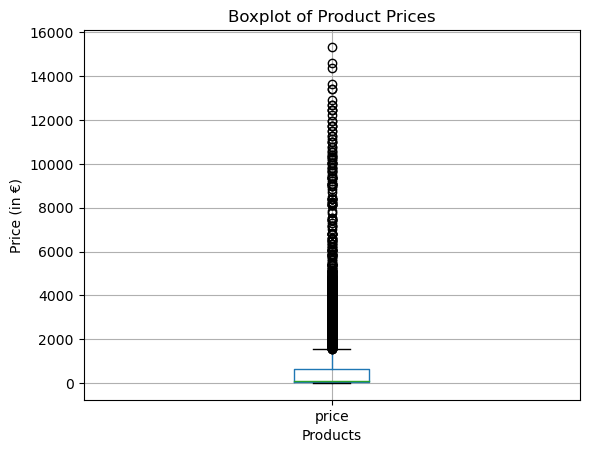

In [72]:
products.boxplot(column='price')
# Set title and labels for clarity
plt.title('Boxplot of Product Prices')
plt.ylabel('Price (in €)')
plt.xlabel('Products')

# Show the plot
plt.show()

In [73]:
# Outliers
Q1 = products['price'].quantile(0.25)
Q3 = products['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = products[(products['price'] < lower_bound) | (products['price'] > upper_bound)]
outliers

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count,promo_percentage
109,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919.00,1699.99,False,1282,4,5,0.1141
118,PAC0507,Apple MacBook Pro 133 '' 25Ghz | 16GB RAM | Fu...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1639.00,1598.99,False,1282,4,5,0.0244
127,PAC0515,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) and ...,2039.00,2037.99,False,1282,4,5,0.0005
136,PAC0510,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 7...",Apple MacBook Pro Fusion Drive 16GB 2 internal...,2039.00,2037.99,False,1282,4,5,0.0005
145,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639.00,1469.00,False,1282,4,4,0.1037
...,...,...,...,...,...,...,...,...,...,...
19112,AP20449,"Like new - Apple Macbook Retina 12 ""Core m5 12...",Retina Display MacBook 12-inch revised and rea...,1799.00,1349.00,False,"5,39E+11",4,5,0.2501
19194,DLL0053,"Dell UltraSharp UP2718Q Monitor 27 ""4K HDR",Monitor 27 inch 4K 4K and 6ms response height ...,1869.99,1569.99,False,1296,4,5,0.1604
19197,PAC2510,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 16GB...",27-inch iMac 5K Retina refitted with 16GB of R...,2869.00,2099.00,False,"5,74E+15",4,5,0.2684
19198,AP20461,"Apple MacBook Pro 15 ""Core i7 Touch Bar 26GHz ...",Refurbished MacBook Pro and 15-inch Apple cert...,2699.00,2198.99,True,"1,02E+12",4,5,0.1853


I conclude that there are no outliers in the price since apple products are much more expensive than computer accessories. No values will be dropped.

In [81]:
products.drop('price_pre_decimal_count', inplace=True)
products

KeyError: "['price_pre_decimal_count'] not found in axis"

## Export

In [63]:
products

,sku,name,desc,price,promo_price,in_stock,type,price_pre_decimal_count,promo_price_pre_decimal_count,promo_percentage
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,True,8696,2,3,0.1667
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,False,13855401,2,3,0.0000
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,False,1387,2,3,0.0341
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,False,1230,2,3,0.0800
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,True,1364,2,2,0.0857
...,...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,True,12282,2,3,0.1000
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,True,1392,2,3,0.0709
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,True,1392,2,3,0.0709
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,False,1392,2,3,0.0709


# Export

In [64]:
products.to_csv('/Users/merlesteffen/Documents/GitHub/Eniac/Data-Eniac/Data_Cleaned/products_clean.csv', index=False)